In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.0.1


In [2]:
torch.cuda.is_available()

True

In [3]:
!nvidia-smi

Thu Jul  6 14:25:13 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 532.03                 Driver Version: 532.03       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080       WDDM | 00000000:0A:00.0  On |                  N/A |
|  0%   46C    P8               43W / 390W|    723MiB / 12288MiB |     11%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# bracket notation helps to define the dimensions of a tensor in PyTorch
x = [[1, 2],[3, 4]]

In [5]:
x = torch.rand(5,3) # rand{0,1} 5 rows, 3 columns
print(x)
print(x.dtype)

tensor([[0.7343, 0.8662, 0.3139],
        [0.3213, 0.6897, 0.2485],
        [0.5751, 0.2358, 0.6630],
        [0.5323, 0.6317, 0.6503],
        [0.4976, 0.5940, 0.4075]])
torch.float32


### Why random tensors?
Random tensors are important because many neural networks are initialized with random numbers, i.e. parameters weights and biases, and adjust these random numbers to better represent the data.

#### Syntax notes
`torch.rand(X, Y, Z)` == `torch.rand(size=X, Y, Z)`, where tensor of X * Y * Z dim

In [81]:
# Example of bracket notation and concept of a 3dim-tensor: 2D RGB image
random_image_tensor = torch.rand(size=(3, 720, 1280)) # RGB color channel, height (pixel), width (pixel)
random_image_tensor.shape, random_image_tensor.ndim

(torch.Size([3, 720, 1280]), 3)

In [82]:
# Create a tensor of all zeros. 
zeros = torch.zeros(size=(3, 720, 1280))
zeros

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

### Notes - Zero tensors
Zero tensors can function as a mask i.e. setting a column, row, etc, or the entire tensor of a target tensor to 0, using matrix mult.

In [83]:
# Using zero tensor as a mask
zeros*random_image_tensor # ... the same result as the zeros tensor above

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [84]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 720, 1280))
ones

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

### Notes - Random, Zeros and Ones tensors
In practice, random tensors are used a lot, so are zeros tensor. Less commonly one tensors are used. But it stands to reason that Ones and Zeros tensors together could be use in conjunction to create manually masks for sparse solutions to a deep learning neural network, or to specify a neural network connectivity (graph) matrix.


In [12]:
# Use torch.arange(start, end 'end-1 index', step)
one_to_ten_tensor = torch.arange(1, 11)
print(one_to_ten_tensor)
ten_to_hundred_tensor = torch.arange(10, 101, 10) # == torch.arange(start=10, end=101, step=10)
print(ten_to_hundred_tensor)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
tensor([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])


In [14]:
# Creating tensors like e.g. zeros_like(input=X_tensor)
ten_zeros_tensor = torch.zeros_like(one_to_ten_tensor)
print(ten_zeros_tensor)
print(one_to_ten_tensor.shape)
print(ten_zeros_tensor.shape)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([10])
torch.Size([10])


In [15]:
# Tensor Datatypes
y1 = torch.ones(5,3, dtype=torch.int16, device="cuda")
y2 = torch.tensor([2.0, 4.0, 6.0, 8.0], 
               dtype=torch.int16, # What datatype the tensor is
               device="cuda", # What device is the tensor on i.e. select device "cpu", "gpu", "cuda", and so on...
               requires_grad=False) # Whether or not to track gradients with this tensor's operations
y3 = torch.tensor([2.0, 2.0, 4.0, 4.0], 
               dtype=torch.int32,
               device="cpu",
               requires_grad=False)
print(y1)
print(y1.dtype)
print()
print(y2)
print(y2.dtype)
print(y2.device)
print()
print(y3)
print(y3.dtype)
print(y3.device)
print()
print("Attempt y2*y3. Should throw an error due to different devices.")
try: print(y2*y3)
except Exception as e: print(e, ":O")

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], device='cuda:0', dtype=torch.int16)
torch.int16

tensor([2, 4, 6, 8], device='cuda:0', dtype=torch.int16)
torch.int16
cuda:0

tensor([2, 2, 4, 4], dtype=torch.int32)
torch.int32
cpu

Attempt y2*y3. Should throw an error due to different devices.
Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! :O


In [16]:
# Changing a datatype
float_double_y2 = y2.type(torch.double) # == y2.type(torch.float64)
print(float_double_y2)
print(float_double_y2.shape, float_double_y2.size())

tensor([2., 4., 6., 8.], device='cuda:0', dtype=torch.float64)
torch.Size([4]) torch.Size([4])


### Notes - Tensor Data Types
There are many torch datatypes. Torch tensors are strictly-typed like Numpy arrays.
Refer to https://pytorch.org/docs/stable/tensors.html#torch-tensor for datatypes.
Recall the level of precision or max-min trade-off for the bit-size a datatype requires
Running a deep learning neural network on a smaller bit-size datatypes typically will be faster, so this embodies the precision vs. speed trade-off.


### Common sources of errors (check tensor attributes)
1. Tensors are not the correct/compatible datatype - check tensor.dtype
2. Tensors are not the correct shape - check tensor.shape (== tensor.size(), a method)
e.g. m x n * n x p shape required for matrix mult 
3. Tensors are not on the right device - check tensor.device
e.g. one tensor is on the "cpu" and another is on the "gpu", and you attempt to perform a matrix operation between these two tensors 

## Manipulating Tensors (Tensor operations)
Tensor operations include:
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix Multiplication

In [17]:
# Basic matrix operations
z = y1 - 0.5
print(z)
print((z - 0.5) * 2) # scale to -1 and 1 from {0,1} range 
#i.e. 0.5 on the range {0, 1} changes to 0 in range {-1,1}

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]], device='cuda:0')
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [18]:
torch.manual_seed(1157)
t1 = torch.rand(3,3)
t2 = torch.rand(3,3)
t3 = torch.rand(3,3)

In [19]:
print(2*z) # 2y : matrix*scalar
print(2*z + z - z - z) # 2z - z : matrix addition/subtraction 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]], device='cuda:0')


In [20]:
print(f" z: {z}")
print(z.shape)
t4 = torch.rand(5,3, device="cuda")
print(f" t4: {t4}")
print(t4.shape)
t5 = torch.rand(3,5, device="cuda")
print(f" t5: {t5}")
print(t5.shape)
print(f" element-wise mult, z * t4: {z * t4}")
print("element-wise mult simply halves the entries of t4 because z is 0.5 in all entries")
print(f" mat-mult (dot product) z * t5: {torch.matmul(z, t5)}")
print("matrix multiplication (dot product) performs, in a 2D case, a row by col element-wise mult then summation ... ")
print("... for each entry in the result. E.g. the 1,1 entry is the element-wise multiplication and summation of...")
print("... the first row of the first tensor and the first column of the second tensor.")

 z: tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]], device='cuda:0')
torch.Size([5, 3])
 t4: tensor([[7.3699e-01, 1.9177e-01, 1.7897e-01],
        [1.8632e-01, 5.1089e-01, 9.2811e-01],
        [3.8807e-01, 3.9561e-01, 6.9177e-01],
        [5.3043e-04, 2.9116e-01, 6.7291e-01],
        [2.4199e-01, 8.6214e-01, 8.2421e-01]], device='cuda:0')
torch.Size([5, 3])
 t5: tensor([[0.4517, 0.2861, 0.8093, 0.7285, 0.9133],
        [0.3703, 0.2577, 0.7517, 0.5376, 0.6788],
        [0.6276, 0.5184, 0.7784, 0.8563, 0.1986]], device='cuda:0')
torch.Size([3, 5])
 element-wise mult, z * t4: tensor([[3.6849e-01, 9.5883e-02, 8.9483e-02],
        [9.3158e-02, 2.5545e-01, 4.6406e-01],
        [1.9403e-01, 1.9781e-01, 3.4589e-01],
        [2.6522e-04, 1.4558e-01, 3.3645e-01],
        [1.2100e-01, 4.3107e-01, 4.1210e-01]], device='cuda:0')
element-wise mult simply halves the entries of t4

In [21]:
tensor_a = z
tensor_b = t5

In [22]:
%%time
# 0ns
#torch.matmul(tensor_a, tensor_b) == torch.mm(tensor_a, tensor_b) shorthand version
torch.mm(tensor_a, tensor_b)

CPU times: total: 0 ns
Wall time: 0 ns


tensor([[0.7248, 0.5311, 1.1697, 1.0612, 0.8954],
        [0.7248, 0.5311, 1.1697, 1.0612, 0.8954],
        [0.7248, 0.5311, 1.1697, 1.0612, 0.8954],
        [0.7248, 0.5311, 1.1697, 1.0612, 0.8954],
        [0.7248, 0.5311, 1.1697, 1.0612, 0.8954]], device='cuda:0')

In [23]:
%%time
 # 3.5~4.0ms using cuda
# final shape is m x n * n * p => m * p
res_m_rows = tensor_a.shape[0]
res_p_cols = tensor_b.shape[1]

output_tensor = torch.empty((res_m_rows, res_p_cols), device="cuda") 
# create an empty tensor of m * p dimensions for manual 2D matrix multiplication
# print(output_tensor.shape) torch.Size([5, 5])

for i, row_i in enumerate(tensor_a):
    temp_list_ = [] 
    # temporary list (a row in the final tensor) to store sums of element-wise row_i * col_j for each i,j combination
    for j, col_j in enumerate(torch.t(tensor_b)): 
        # uses transpose (torch.t) to flip the orientation of tensor_b i.e. rows -> cols, cols -> rows ...
        # ... 'for' loops over the first indexing major i.e. rows in Python by default (C: row-major). 
        # There are packages and methods that use Fortran-major (F: col major) and loop over cols by default.    
        val_ = torch.sum(row_i*col_j).item()
        # uses torch.sum to sum the individual element-wise multiplications of the elements from row_i * col_j
        temp_list_.append(val_) # append each sum to the temporary list
    if (len(temp_list_)==res_p_cols):
        output_tensor[i,:] = torch.tensor(temp_list_, device="cuda") 
        # convert temp list (a row) to tensor and insert into output tensor using row index (row i)
    else: break # stop if temporary list is of wrong dimension
        
output_tensor

CPU times: total: 0 ns
Wall time: 3.94 ms


tensor([[0.7248, 0.5311, 1.1697, 1.0612, 0.8954],
        [0.7248, 0.5311, 1.1697, 1.0612, 0.8954],
        [0.7248, 0.5311, 1.1697, 1.0612, 0.8954],
        [0.7248, 0.5311, 1.1697, 1.0612, 0.8954],
        [0.7248, 0.5311, 1.1697, 1.0612, 0.8954]], device='cuda:0')

### Other Tensor functions (and other tensor aggregrate operations)
(tensor aggregation a tensor -> a smaller amount of #'s)

In [24]:
r = (torch.rand(3, 3) - 0.5) * 2 # scale values from {0,1} to between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))

print('\nMinimum value of r:')
print(torch.min(r), '==', r.min())

print('\nMaximum value of r:')
print(torch.max(r), '==', r.max())

print('\nSum of r:') # the sum of the individual values/elements in a tensor, where it could be the whole tensor or a subset
print(torch.sum(r), '==', r.sum())

A random matrix, r:
tensor([[ 0.4462, -0.6505,  0.2924],
        [ 0.3684, -0.4274, -0.1105],
        [-0.0149,  0.2337, -0.7636]])

Absolute value of r:
tensor([[0.4462, 0.6505, 0.2924],
        [0.3684, 0.4274, 0.1105],
        [0.0149, 0.2337, 0.7636]])

Inverse sine of r:
tensor([[ 0.4625, -0.7082,  0.2967],
        [ 0.3773, -0.4416, -0.1107],
        [-0.0149,  0.2359, -0.8688]])

Determinant of r:
tensor(-0.0037)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.7536, -0.2654,  0.6014],
        [-0.3748, -0.5782, -0.7247],
        [ 0.5401, -0.7715,  0.3362]]),
S=tensor([1.0887, 0.7005, 0.0048]),
V=tensor([[-0.4430, -0.4566, -0.7715],
        [ 0.7133,  0.3418, -0.6119],
        [-0.5431,  0.8214, -0.1743]]))

Average and standard deviation of r:
(tensor(0.4517), tensor(-0.0696))

Minimum value of r:
tensor(-0.7636) == tensor(-0.7636)

Maximum value of r:
tensor(0.4462) == tensor(0.4462)

Sum of r:
tensor(-0.6262) == tensor(-0.6262)


In [25]:
# Locating indices
# Example: torch.argmin(X), returns the indices of the minimum value(s) of the flattened tensor or along a dimension

print('\nMinimum value of r, each row:')
print(torch.min(r, dim=1)) # min from each row

print('\nMinimum value of r, each column:')
print(torch.min(r, dim=0)) # min from each column

print('\nIndice of Minimum value of r:')
min_index = torch.argmin(r) # will return the index along a flattened tensor
print('index:', min_index)
print('value:', torch.flatten(r)[min_index]) # need to flatten the tensor and pass the index


Minimum value of r, each row:
torch.return_types.min(
values=tensor([-0.6505, -0.4274, -0.7636]),
indices=tensor([1, 1, 2]))

Minimum value of r, each column:
torch.return_types.min(
values=tensor([-0.0149, -0.6505, -0.7636]),
indices=tensor([2, 0, 2]))

Indice of Minimum value of r:
index: tensor(8)
value: tensor(-0.7636)


In [26]:
# Example: torch.argmax(X), returns the indices of the maximum value(s) of the flattened tensor or along a dimension

print('\nMaximum value of r, each row:')
print(torch.max(r, dim=1)) # min from each row

print('\nMaximum value of r, each column:')
print(torch.max(r, dim=0)) # min from each column

print('\nIndice of Maximum value of r:')
max_index = torch.argmax(r) # will return the index along a flattened tensor
print('index:', max_index)
print('value:', torch.flatten(r)[max_index]) # need to flatten the tensor and pass the index


Maximum value of r, each row:
torch.return_types.max(
values=tensor([0.4462, 0.3684, 0.2337]),
indices=tensor([0, 0, 1]))

Maximum value of r, each column:
torch.return_types.max(
values=tensor([0.4462, 0.2337, 0.2924]),
indices=tensor([0, 2, 0]))

Indice of Maximum value of r:
index: tensor(0)
value: tensor(0.4462)


## Reshaping, stacking, squeezing and unsqueezing tensors
* Reshaping - reshapes an input tensor to a defined shape
* View - return a veiew of an input tensor of certain shape, but keep the same memory as the original tensor (always share the same memory as the original tensor)
* Stacking - combine multiple tensors on top of each other (vstack i.e. vertical stack) or side by side (hstack i.e. horizontal stack)
* Squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - return a View of the input of the input with dimensions permuted (swapped/modified) in a certain way  

The goal is to modify the shape of a tensor to enable certain operations, being fed into the deep learning neural network architecture, and so on.

### Reshape
`tensor.reshape(( new dim(s) ))`  
Copies and reshapes the existing tensor to the new dim(s), where new dim(s) must be divisible by the existing dimensions.  
When possible, the returned tensor will be a view of input . Otherwise, it will be a copy.
Therefore, in some cases, changes to values in the new tensor will mutate the original tensor, unless torch.clone(original_tensor) is used.

In [27]:
# Create a basic tensor
x = torch.arange(1., 10., 1.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [28]:
# Reshape (9,) to (3, 3)
x_reshaped_clone = torch.clone(x).reshape(3, 3)
x_reshaped_clone, x_reshaped_clone.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

In [29]:
x_reshaped_clone = torch.clone(x).reshape(1, 9)
x_reshaped_clone, x_reshaped_clone.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [30]:
x_reshaped_clone = torch.clone(x).reshape(9, 1)
x_reshaped_clone, x_reshaped_clone.shape

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 torch.Size([9, 1]))

In [31]:
x_reshaped_clone[0] = 15
x, x_reshaped_clone # 0-index in 1D Tensor is 15 only for reshaped clone

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([[15.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.]]))

In [32]:
x_reshaped = x.reshape(9, 1)
x_reshaped[0] = 15 # or x[0] = 15
x, x_reshaped # 0-index in 1D Tensor is 15 in both

(tensor([15.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 tensor([[15.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.]]))

### View
`tensor.view( new dim(s) )`  
Changes the view of the existing tensor to the new dim(s), where new dim(s) must be divisible by the existing dimensions.  
A view shares the same memory as the original tensor and will result in mutation, other than the shape.

In [33]:
# Change the view
x = torch.arange(1., 10., 1.)
z = x.view(3,3)
z, z.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

In [34]:
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [41]:
# Changing the values in the View or the original tensor results in the values changing for both
x[0] = 5.2
print(x)
print(z)

tensor([5.2000, 2.0000, 3.0000, 4.0000, 5.0000, 6.0000, 7.0000, 8.0000, 9.0000])
tensor([[5.2000, 2.0000, 3.0000],
        [4.0000, 5.0000, 6.0000],
        [7.0000, 8.0000, 9.0000]])


### Permute
`torch.permute(input_tensor, dims)` or `tensor.permute(dims)`
Rearranges the dimensions of a target tensor in the specified order, and returns a View of the input of the input with dimensions permuted (swapped/modified) as specified. In layman terms, the order of the dimensions of the tensor are swapped.
As a Permute is a View, it shares the same memory as the original tensor and will result in mutation, other than the shape.

In [85]:
# Recall this random image tensor from earlier
# random_image_tensor = torch.rand(size=(3, 720, 1280)) # RGB color channel, height (pixel), width (pixel)
random_image_tensor.shape, random_image_tensor.ndim

(torch.Size([3, 720, 1280]), 3)

In [86]:
random_image_tensor_permuted = random_image_tensor.permute(1 , 2, 0)  # shifts axis 1->0, 2->1, & 0->2 
random_image_tensor_permuted.shape, random_image_tensor_permuted.ndim
# now axes are height (pixel), width (pixel), RGB color channel,

(torch.Size([720, 1280, 3]), 3)

In [87]:
# Changing the values in the permutation or the original tensor results in the values changing for both
print("Before change:", random_image_tensor_permuted[100, 100, :])
random_image_tensor_permuted[100, 100, 0] = 255 # change R-value of RGB for pixel 100, 100
print("After change:")
print(random_image_tensor_permuted[100, 100, :])
print(random_image_tensor[:, 100, 100])
# Changes in both the original tensor and permutation

Before change: tensor([0.5124, 0.7302, 0.4445])
After change:
tensor([255.0000,   0.7302,   0.4445])
tensor([255.0000,   0.7302,   0.4445])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original tensor cannot display: Invalid shape (3, 720, 1280) for image data


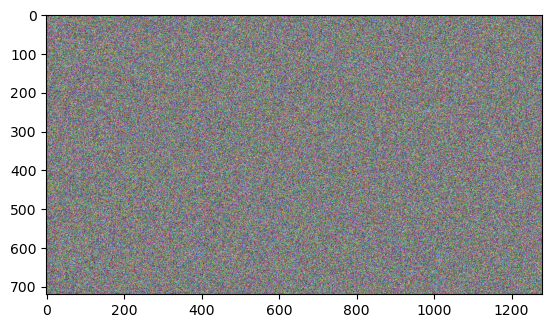

In [91]:
# Display the image
try: plt.imshow(random_image_tensor) 
# plt.imshow requires RGB channel in last dimension and will not display an image for the original tensor in...
# ... RGB, height, width
except Exception as e: print("Original tensor cannot display:", e)

# the permutation is in the correct format and can display properly i.e. in height, width, RGB format
plt.imshow(random_image_tensor_permuted)

### Stacking
`torch.stack([x, x, x, x]), dim=?)`  
`dim=0` => vstack  
`dim=1` => hstack  
45132 

In [ ]:
# Stack tensors on top / side-by-side of each other
x = torch.arange(1., 10., 1.)
x_stacked = torch.stack([x, x, x], dim=0)
x_stacked, x_stacked.shape

In [ ]:
x_vstacked = torch.vstack([x, x, x])
x_vstacked, x_vstacked.shape

In [ ]:
x_stacked = torch.stack([x, x, x], dim=1)
x_stacked, x_stacked.shape

In [ ]:
x_hstacked = torch.hstack([x, x, x]) # dimensionality was reduced
x_hstacked, x_hstacked.shape

### Squeeze, Unsqueeze
`torch.squeeze(target_tensor)` - removes all single dimensions from a target tensor, can remove target dims with `torch.squeeze(target_tensor, dim=?)`

`torch.unsqueeze(target_tensor)` - adds a single dimension to a target tensor at a specific dim

In [ ]:
z = x.view(1, 9) # add an extra 1-dim to the Tensor i.e. outer square brackets

# torch.squeeze() example
print(f"Previous tensor: {z}")
print(f"Previous shape: {z.shape}")

# remove extra 1 dimensions from z (i.e. x with 1 extra dimension)
z_squeezed = z.squeeze()
print(f"\nNew tensor: {z_squeezed}")
print(f"New shape: {z_squeezed.shape}")

In [ ]:
# torch.unsqueeze() example
print(f"Previous tensor: {x}")
print(f"Previous shape: {x.shape}")

# add extra 1 dimensions to x (i.e. x with 1 extra dimension)
x_unsqueezed = x.unsqueeze(dim=0) # added 1 extra dimenson on 0-th dim i.e. the row dim
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

# z == x_unsqueezed => True

# add extra 1 dimensions to x (i.e. x with 1 extra dimension)
x_unsqueezed = x.unsqueeze(dim=1) # added 1 extra dimenson on 1-st dim i.e. the col dim
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

print(f"\nSqueeze the unsqueezed col x: {x_unsqueezed.squeeze()}") # back to original